# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [ ]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [ ]:
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  x_out = x_in[::2, ::2]


  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1 5]
 [4 1]]


Let's try that on an image to get a feel for how it works:

In [ ]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

--2025-10-31 01:26:10--  https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60792 (59K) [image/png]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  59.37K  --.-KB/s    in 0.01s   

2025-10-31 01:26:11 (5.02 MB/s) - ‘test_image.png’ saved [60792/60792]



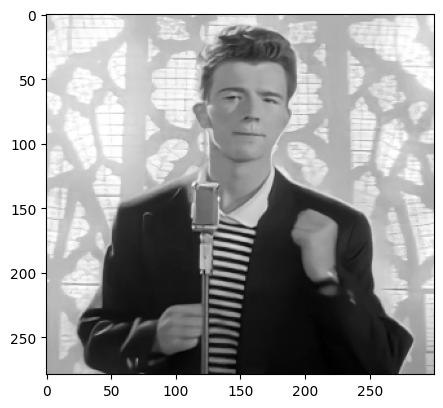

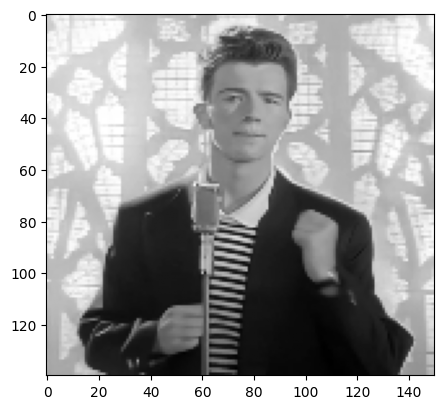

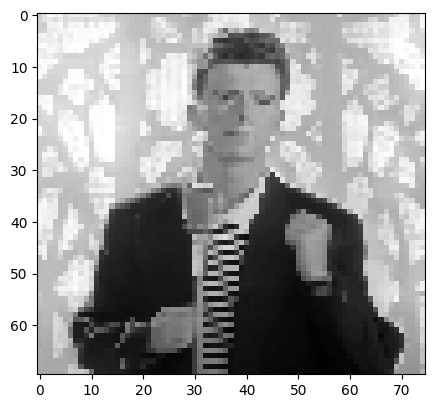

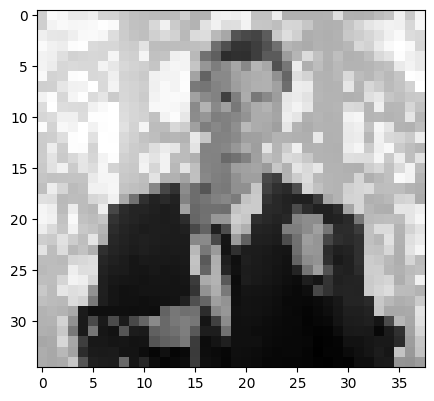

In [ ]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [ ]:
# Now let's try max-pooling
def maxpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  for i in range(0, x_in.shape[0] - 1, 2):  # Stopping one element earlier
    for j in range(0, x_in.shape[1] - 1, 2):  # Stopping one element earlier
      window = x_in[i:min(i + 2, x_in.shape[0]), j:min(j + 2, x_in.shape[1])]  # Adjusted window
      x_out[i // 2, j // 2] = np.max(window)
  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


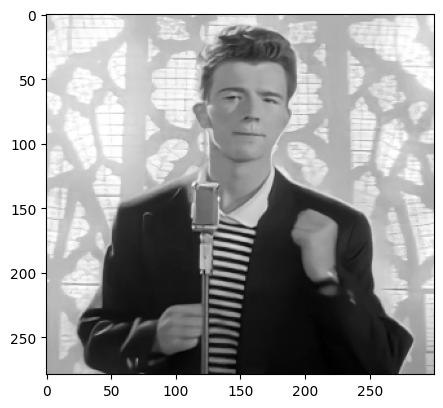

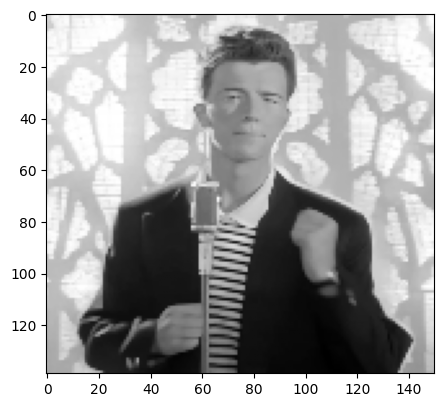

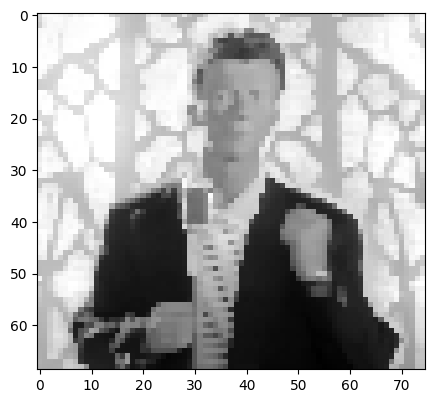

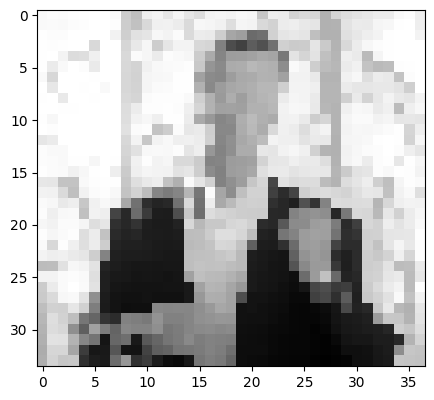

In [ ]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [ ]:

# Finally, let's try mean pooling
def meanpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  for i in range(0, x_in.shape[0] - 1, 2):  # Stopping one element earlier
    for j in range(0, x_in.shape[1] - 1, 2):  # Stopping one element earlier
      window = x_in[i:min(i + 2, x_in.shape[0]), j:min(j + 2, x_in.shape[1])]  # Adjusted window
      x_out[i // 2, j // 2] = np.mean(window)  # Calculate mean of the window
  return x_out

  return x_out

In [ ]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


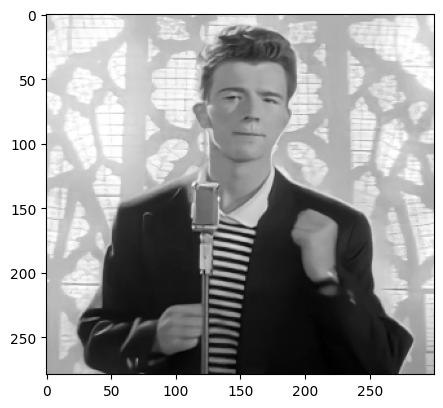

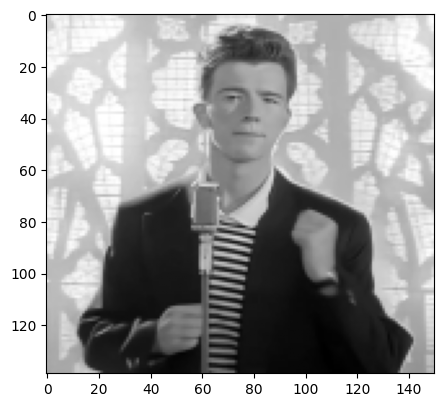

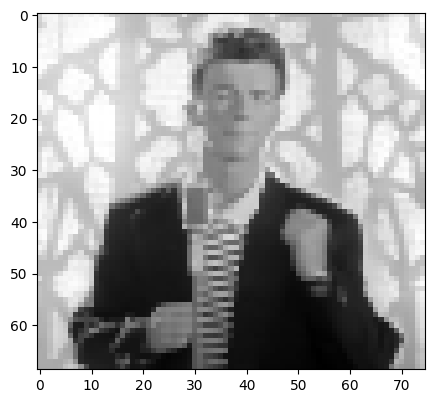

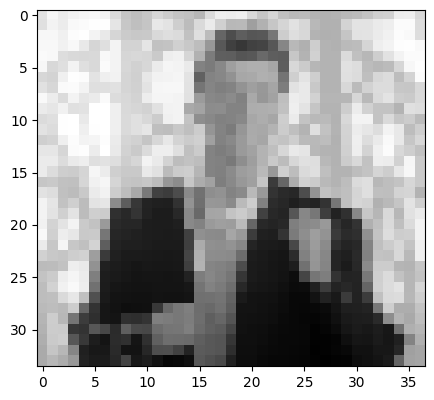

In [ ]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [ ]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [ ]:
# Let's first use the duplication method
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the duplication routine
  # Replace this line
  x_out = x_out

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


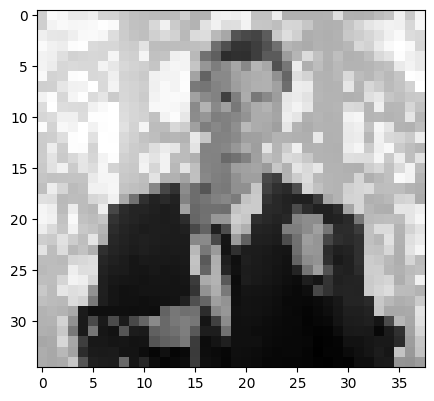

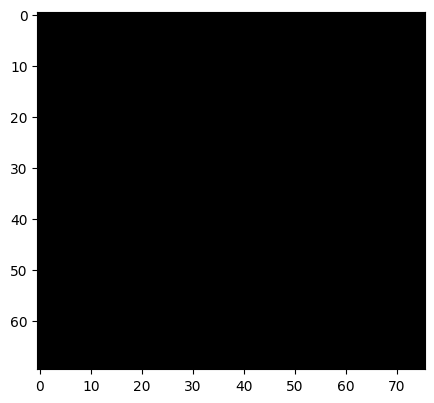

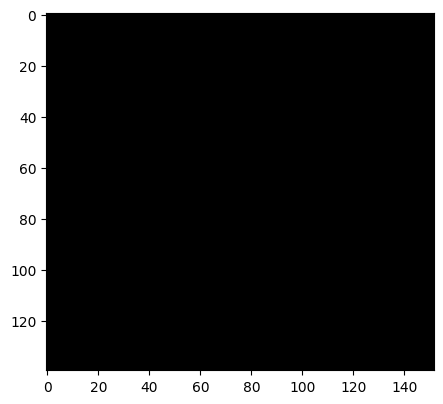

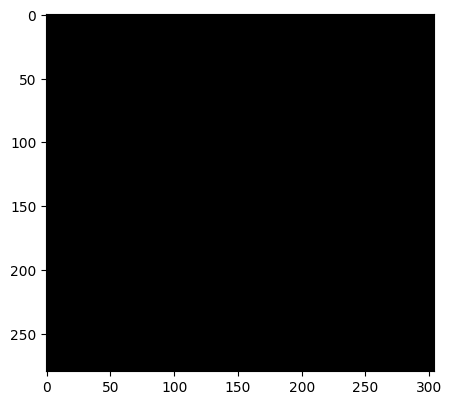

In [ ]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [ ]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TO DO -- write the subsampling routine
  # Replace this line
   # Create a mask to track positions of max values in x_high_res
  mask = np.zeros_like(x_out, dtype=bool)

  for i in range(x_in.shape[0]):
    for j in range(x_in.shape[1]):
      # Find the index of the maximum element in the corresponding 2x2 block in x_high_res
      # Ensure the slicing does not go out of bounds
      max_index = np.argmax(x_high_res[i * 2: min((i + 1) * 2, x_high_res.shape[0]),
                                        j * 2: min((j + 1) * 2, x_high_res.shape[1])])

      # Convert the flat index to 2D coordinates within the 2x2 block
      row_offset, col_offset = np.unravel_index(max_index, (min(2, x_high_res.shape[0] - i * 2),
                                                             min(2, x_high_res.shape[1] - j * 2)))

      # Mark the position of the maximum value in the mask
      mask[i * 2 + row_offset, j * 2 + col_offset] = True

      # Place the element from x_in into the corresponding position in x_out
      x_out[i * 2 + row_offset, j * 2 + col_offset] = x_in[i, j]

  # Fill remaining positions in x_out by duplicating values
  # based on nearest neighbors in x_in:

  # Iterate through x_out and fill zero values
  for i in range(x_out.shape[0]):
    for j in range(x_out.shape[1]):
      if x_out[i, j] == 0:  # If the current element is zero
        # Get coordinates of nearest non-zero neighbor in x_in
        ni = min(max(0, i // 2), x_in.shape[0] - 1)
        nj = min(max(0, j // 2), x_in.shape[1] - 1)

        # Assign the value from the neighbor
        x_out[i, j] = x_in[ni, nj]

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[6. 6. 8. 8.]
 [6. 6. 8. 8.]
 [8. 8. 4. 4.]
 [8. 8. 4. 4.]]


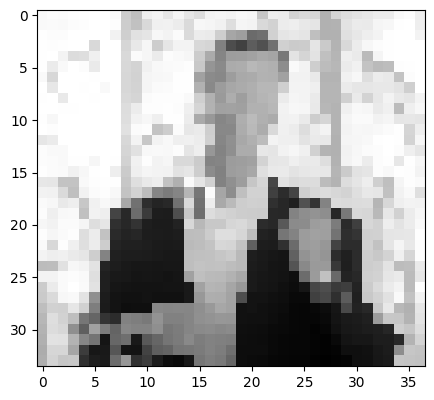

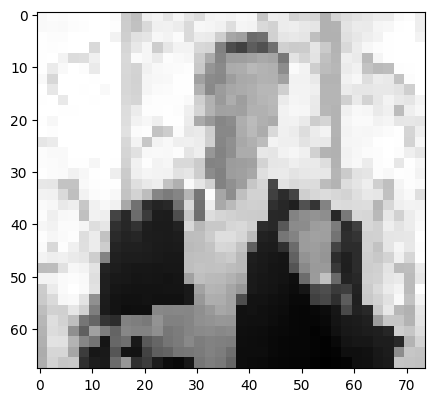

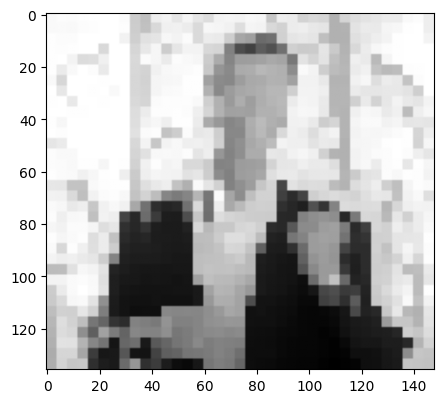

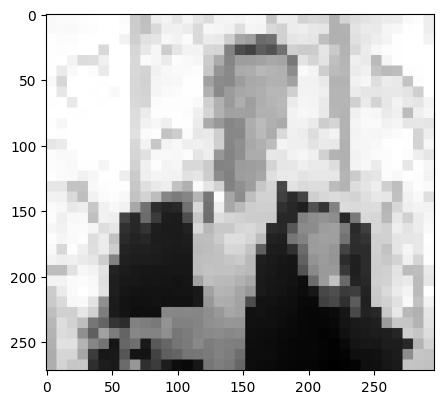

In [ ]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [ ]:
def bilinear(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # TO DO -- write the duplication routine
  # Replace this line
  for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            x = i / 2
            y = j / 2

            x1 = int(np.floor(x))
            x2 = int(np.ceil(x))
            y1 = int(np.floor(y))
            y2 = int(np.ceil(y))

            # Handle edge cases where x or y are at the boundary
            x1 = min(x1, x_in.shape[0] - 1)
            x2 = min(x2, x_in.shape[0] - 1)
            y1 = min(y1, x_in.shape[1] - 1)
            y2 = min(y2, x_in.shape[1] - 1)

            # Weight calculation (with safe division)
            if x2 == x1:
                w11, w21 = 1, 0
            else:
                w11 = (x2 - x) / (x2 - x1)
                w21 = (x - x1) / (x2 - x1)

            if y2 == y1:
                w12, w22 = 1, 0  # Assign weights for same points
            else:
                w12 = (y2 - y) / (y2 - y1)
                w22 = (y - y1) / (y2 - y1)

            # Interpolation (with bounds check and safe division)
            x_out[i, j] = (w11 * w12 * x_in_pad[x1, y1] +
                           w11 * w22 * x_in_pad[x1, y2] +
                           w21 * w12 * x_in_pad[x2, y1] +
                           w21 * w22 * x_in_pad[x2, y2])

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[6.  7.  8.  8. ]
 [7.  6.5 6.  6. ]
 [8.  6.  4.  4. ]
 [8.  6.  4.  4. ]]


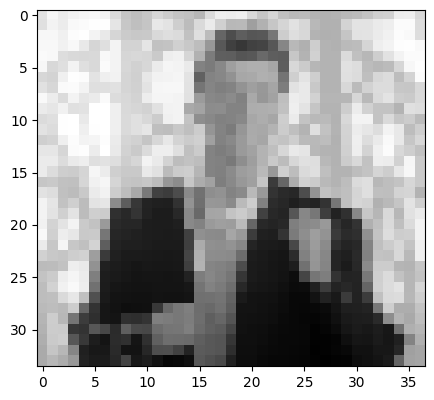

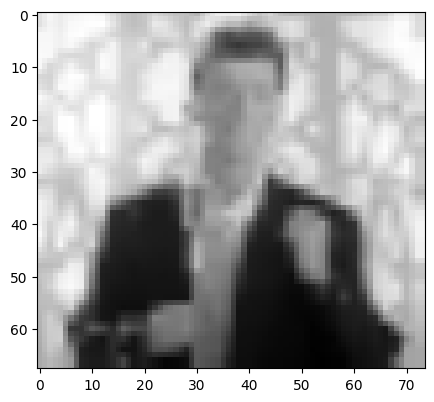

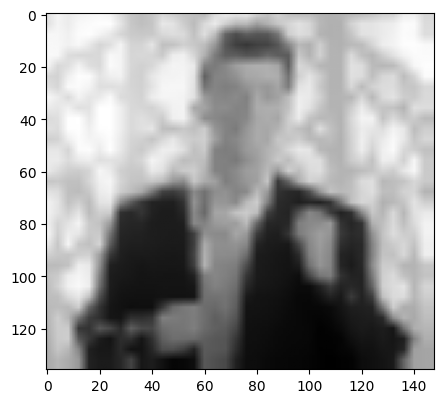

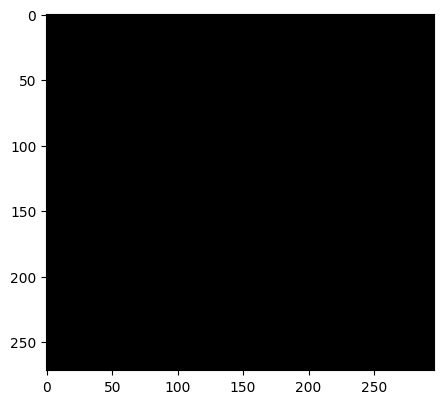

In [ ]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()